In [4]:
# pip install pandas
# pip install numpy

import pandas as pd
import numpy as np

file1_path = r'/Users/tangjiahong/Dropbox/taishin/file1.csv'
file2_path = r'/Users/tangjiahong/Dropbox/taishin/file2.csv'


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)



## 整合CSV

In [ ]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()


In [ ]:
# 'srno_2'列作為df1和df3的索引，确保它们是字符串類型
df1.set_index('srno_2', inplace=True)
# 將'srno_2'和'yyyymm'作為df2的多重索引
df2.set_index(['srno_2', 'yyyymm'], inplace=True)


In [ ]:
# 將df2的索引重置為ˊ列以便於合併
df2_reset = df2.reset_index()

# 基于srno_2合併df1的數據到df2
# 注意：實際操作需要根據實際數據結構調整
merged_df = pd.merge(df2_reset, df1, on='srno_2', how='left')



In [ ]:
# 打印合併後DataFrame的欄位名稱
print(merged_df.columns)

# 打印合併後DataFrame的前五行數據
print(merged_df.head(20))


Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum04', 'aum05',
       'aum06', 'aum07', 'aum08', 'aum09', 'aum10', 'aum11', 'aum12',
       'bill_a1', 'bill_a2', 'bill_a3', 'bill_a4', 'bill_a5', 'bill_a6',
       'pmt_a01', 'pmt_a02', 'pmt_a03', 'pmt_a04', 'pmt_a05', 'pmt_a06',
       'pmt_a07', 'pmt_a08', 'pmt_a09', 'pmt_a10', 'pmt_a11', 'pmt_a12',
       'pmt_a13', 'pmt_a14', 'pmt_a15', 'pmt_a16', 'pmt_a17', 'pmt_a18',
       'pmt_c01', 'pmt_c02', 'pmt_c03', 'pmt_c04', 'pmt_c05', 'pmt_c06',
       'pmt_c07', 'pmt_c08', 'pmt_c09', 'pmt_c10', 'pmt_c11', 'pmt_c12',
       'pmt_c13', 'pmt_c14', 'pmt_c15', 'pmt_c16', 'pmt_c17', 'pmt_c18',
       'dep_a1', 'dep_a2', 'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 'dep_c3',
       'dep_c4', 'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A',
       'CNT_Exchange_B', 'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login',
       'YN_SLR', 'INV_ADV', 'rs_prod_1', 'rs_prod_2', 'rs_prod_3', 'gender',
       'age', 'edu', 'mry', 'job', 'occp', 'zip', 

## 刪除變數 + 轉換Y,N to 1,0

In [ ]:
# 假設 merged_df 是最終合併的 DataFrame

# 刪除不必要的變數
merged_df.drop(['rs_prod_1','rs_prod_2'], axis=1, inplace=True)

# 接下來數據分割和模型訓練等後續步驟


+ 資料裡面只有Y跟0 : 

    + intr_13 行為/互動標籤_類別13   

    + intr_12 行為/互動標籤_類別12
    
    

+ 資料裡面只有Y跟空白：
    
    + YN_Web_Active 數位會員活躍度標籤
       
    + YN_secur 證券戶標籤
    
    + YN_SLR 是否為薪轉戶
    
    


In [ ]:
# 假設df是您的DataFrame

# 將'Y'轉換成1，將'0'和空白轉換成0
# 先去除列中值的前後空格

merged_df['intr_12'] = merged_df['intr_12'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
merged_df['intr_13'] = merged_df['intr_13'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
merged_df['YN_Web_Active'] = merged_df['YN_Web_Active'].str.strip().replace({'Y': 1}).fillna(0).astype(int)
merged_df['YN_secur'] = merged_df['YN_secur'].str.strip().replace({'Y': 1}).fillna(0).astype(int)
merged_df['YN_SLR'] = merged_df['YN_SLR'].str.strip().replace({'Y': 1}).fillna(0).astype(int)

# 現在每個指定的列都應該只包含整數1和0
print(merged_df[['intr_12','intr_13', 'YN_Web_Active', 'YN_secur', 'YN_SLR']])


C:\Users\User\AppData\Local\Temp\ipykernel_26448\732219706.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['intr_12'] = merged_df['intr_12'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_26448\732219706.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['intr_13'] = merged_df['intr_13'].str.strip().replace({'Y': 1, '0': 0}).fillna(0).astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_26448\732219706.py:8: FutureWarning: Downcasting behavior in `r

         intr_12  intr_13  YN_Web_Active  YN_secur  YN_SLR
0              0        1              0         0       0
1              0        1              0         0       0
2              0        1              0         0       0
3              0        1              0         0       0
4              0        1              0         0       0
...          ...      ...            ...       ...     ...
2399995        1        0              1         0       1
2399996        1        0              1         0       1
2399997        1        0              1         0       1
2399998        1        0              1         0       1
2399999        1        0              1         0       1

[2400000 rows x 5 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_26448\732219706.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['YN_SLR'] = merged_df['YN_SLR'].str.strip().replace({'Y': 1}).fillna(0).astype(int)


In [ ]:
# 匯出成csv
merged_df.to_csv('merged_df.csv', index=False)


In [5]:
# 看唯一值
import pandas as pd
merged_df = pd.read_csv('merged_df.csv')
unique_values = merged_df['intr_12'].unique()
print(unique_values)


[0 1]


In [6]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 94 columns):
 #   Column          Dtype  
---  ------          -----  
 0   srno_2          int64  
 1   yyyymm          int64  
 2   aum01           int64  
 3   aum02           int64  
 4   aum03           int64  
 5   aum04           int64  
 6   aum05           int64  
 7   aum06           int64  
 8   aum07           int64  
 9   aum08           int64  
 10  aum09           int64  
 11  aum10           int64  
 12  aum11           int64  
 13  aum12           int64  
 14  bill_a1         int64  
 15  bill_a2         int64  
 16  bill_a3         int64  
 17  bill_a4         int64  
 18  bill_a5         int64  
 19  bill_a6         int64  
 20  pmt_a01         int64  
 21  pmt_a02         int64  
 22  pmt_a03         int64  
 23  pmt_a04         int64  
 24  pmt_a05         int64  
 25  pmt_a06         int64  
 26  pmt_a07         int64  
 27  pmt_a08         int64  
 28  pmt_a09     

## Drop掉 rs_prod_3 為0的

In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv(r'C:\Users\User\Dropbox\taishin\taishin\merged_df.csv')

# 刪除 'rs_prod_3' 為 0 的行
df_filtered = df[df['rs_prod_3'] != 1]

# 存回 CSV 檔案
df_filtered.to_csv(r'C:\Users\User\Dropbox\taishin\taishin\drop1_df.csv', index=False)


## EDA分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 加載數據
drop0_df = pd.read_csv(r'/Users/tangjiahong/Dropbox/taishin/taishin/drop0_df.csv')
drop1_df = pd.read_csv(r'/Users/tangjiahong/Dropbox/taishin/taishin/drop1_df.csv')



In [53]:
# 檢查數據中是否有異常值，比如過大的整數，這些可能是溢出
print(drop1_df.describe())

# 確保所有數據都是有限的

assert np.all(np.isfinite(drop1_df)), "Data contains non-finite values"


             srno_2        yyyymm         aum01         aum02         aum03  \
count  2.352002e+06  2.352002e+06  2.352002e+06  2.352002e+06  2.352002e+06   
mean   9.918619e+04  2.022982e+05  1.013410e+05  8.061641e+04  9.455886e+03   
std    5.732654e+04  2.612467e+01  4.060816e+05  3.571919e+05  1.110964e+05   
min    1.000000e+00  2.022120e+05  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.956625e+04  2.023030e+05  0.000000e+00  0.000000e+00  0.000000e+00   
50%    9.912600e+04  2.023060e+05  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.487110e+05  2.023090e+05  7.206000e+03  5.226000e+03  0.000000e+00   
max    2.000000e+05  2.023110e+05  7.406994e+07  7.406994e+07  1.948884e+07   

              aum04         aum05         aum06         aum07         aum08  \
count  2.352002e+06  2.352002e+06  2.352002e+06  2.352002e+06  2.352002e+06   
mean   2.072459e+04  2.768946e+03  1.485988e+04  1.487634e+03  4.182822e+02   
std    1.582767e+05  5.025027e+04  1.286738e+05  4.

## [19] [25][27] 要一起改 ex drop1_df

In [141]:
# 群集分析 (以drop0為例)
# 特徵選擇和預處理

features = drop0_df # 假設的特徵列
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [142]:
drop0_df.dtypes


srno_2     int64
yyyymm     int64
aum01      int64
aum02      int64
aum03      int64
           ...  
intr_10    int64
intr_11    int64
intr_12    int64
intr_13    int64
cluster    int32
Length: 93, dtype: object

## 判斷群集cluster要設幾個 
+ 彎肘法

+ 輪廓係數法

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

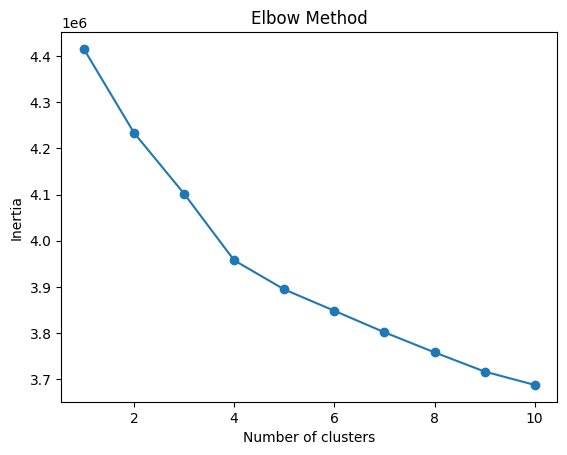

In [143]:
# 彎肘法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假設你的特徵數據是 features_scaled
# 假設你想要嘗試的群集數量範圍是1到10
# 這裡做了一個迴圈來計算每個群集數量下的群集內部變異度
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# 繪製彎肘圖
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

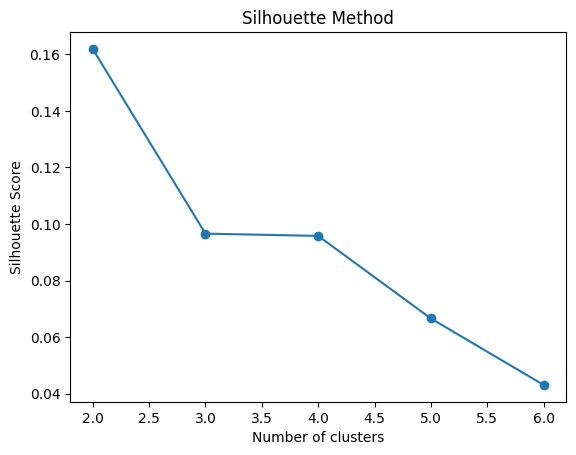

In [9]:
# 輪廓係數法
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 繪製輪廓係數圖
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


In [108]:
# K-means群集
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)
drop0_df['cluster'] = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
# K-means群集
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)
drop0_df['cluster'] = kmeans.labels_

# 移除DataFrame列名中的多餘空格
drop0_df.columns = drop0_df.columns.str.strip()

# 再次列出清理後的列名，確保它們已被正確修正
print(drop0_df.columns)


Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum04', 'aum05',
       'aum06', 'aum07', 'aum08', 'aum09', 'aum10', 'aum11', 'aum12',
       'bill_a1', 'bill_a2', 'bill_a3', 'bill_a4', 'bill_a5', 'bill_a6',
       'pmt_a01', 'pmt_a02', 'pmt_a03', 'pmt_a04', 'pmt_a05', 'pmt_a06',
       'pmt_a07', 'pmt_a08', 'pmt_a09', 'pmt_a10', 'pmt_a11', 'pmt_a12',
       'pmt_a13', 'pmt_a14', 'pmt_a15', 'pmt_a16', 'pmt_a17', 'pmt_a18',
       'pmt_c01', 'pmt_c02', 'pmt_c03', 'pmt_c04', 'pmt_c05', 'pmt_c06',
       'pmt_c07', 'pmt_c08', 'pmt_c09', 'pmt_c10', 'pmt_c11', 'pmt_c12',
       'pmt_c13', 'pmt_c14', 'pmt_c15', 'pmt_c16', 'pmt_c17', 'pmt_c18',
       'dep_a1', 'dep_a2', 'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 'dep_c3',
       'dep_c4', 'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A',
       'CNT_Exchange_B', 'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login',
       'YN_SLR', 'INV_ADV', 'rs_prod_3', 'gender', 'age', 'edu', 'mry', 'job',
       'occp', 'zip', 'intr_01', 'intr_02', 'int

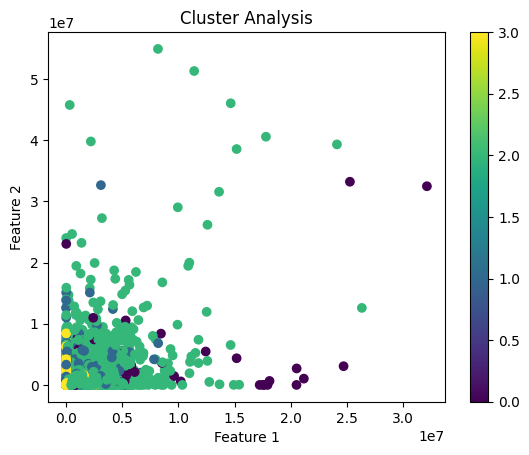

In [25]:
# 確保drop0_df中已經有了'cluster'列，這是聚類的結果
plt.scatter(drop0_df['aum02'], drop0_df['dep_a4'], c=drop0_df['cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Analysis')
plt.colorbar()  # 顯示色條以便識別不同的群集
plt.show()


In [17]:
# 計算每個群集的特徵均值
cluster_means = drop0_df.groupby('cluster').mean()

# 打印每個群集的均值
print(cluster_means)


                srno_2         yyyymm         aum01         aum02  \
cluster                                                             
0        141342.079280  202295.839440  2.500974e+06  1.040916e+06   
1        137130.558422  202298.016464  4.050886e+05  3.679211e+05   
2        146632.254029  202298.190638  1.180007e+06  1.125630e+06   
3        137271.110157  202296.310701  8.346092e+04  7.053974e+04   

                 aum03         aum04          aum05          aum06  \
cluster                                                              
0        390661.395070  1.460058e+06  284906.532978  857585.840773   
1         62186.498833  3.716758e+04    7671.734488   23531.160585   
2        241022.923344  5.437685e+04   10424.318269   38906.278013   
3         12660.637431  1.292121e+04    1928.839471   10039.196802   

                 aum07         aum08  ...     intr_04        intr_05  \
cluster                               ...                              
0        125749.4863

In [18]:
# 計算每個群集的大小
cluster_sizes = drop0_df['cluster'].value_counts()

# 打印每個群集的大小
print(cluster_sizes)


cluster
3    25391
2    12967
1     8139
0     1501
Name: count, dtype: int64


## 類別看不同cluster 平均值 & boxplot

In [79]:
aum_features = [f'aum{i:02d}' for i in range(1, 13)]
bill_features = [f'bill_a{i}' for i in range(1, 7)]
pmt_a_features = [f'pmt_a{i:02d}' for i in range(1, 19)]
pmt_c_features = [f'pmt_c{i:02d}' for i in range(1, 19)]
dep_a_features = [f'dep_a{i}' for i in range(1, 5)]
dep_c_features = [f'dep_c{i}' for i in range(1, 5)]
intr_features = [f'intr_{i:02d}' for i in range(1, 13)] 
AMT_A_features = [f'AMT_Exchange_A']
AMT_B_features = [f'AMT_Exchange_B']
CNT_A_features = [f'CNT_Exchange_A']
CNT_B_features = [f'CNT_Exchange_B']

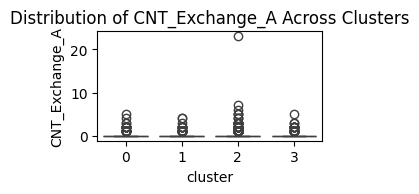

In [85]:
# 将所有特征列表合并成一个
all_features = CNT_A_features

# 例如，绘制箱型图
plt.figure(figsize=(15, 10))
for i, feature in enumerate(all_features, 1):
    plt.subplot(6, 6, i)  # 可能需要调整子图布局
    sns.boxplot(x='cluster', y=feature, data=drop0_df)
    plt.title(f'Distribution of {feature} Across Clusters')

plt.tight_layout()
plt.show()


In [37]:
# 資產配置
cluster_summary = drop0_df.groupby('cluster')[aum_features].mean()

print(cluster_summary)


                aum01         aum02          aum03         aum04  \
cluster                                                            
0        2.500974e+06  1.040916e+06  390661.395070  1.460058e+06   
1        4.050886e+05  3.679211e+05   62186.498833  3.716758e+04   
2        1.180007e+06  1.125630e+06  241022.923344  5.437685e+04   
3        8.346092e+04  7.053974e+04   12660.637431  1.292121e+04   

                 aum05          aum06          aum07         aum08  \
cluster                                                              
0        284906.532978  857585.840773  125749.486342  69902.097935   
1          7671.734488   23531.160585    1291.061555   1905.296597   
2         10424.318269   38906.278013    1218.014961   1555.834349   
3          1928.839471   10039.196802     289.197117     58.449175   

                aum09        aum10         aum11         aum12  
cluster                                                         
0        23048.404397    58.618254  9628

In [81]:
# 換匯金額_線下
cluster_summary = drop0_df.groupby('cluster')[AMT_A_features].mean()

print(cluster_summary)


         AMT_Exchange_A
cluster                
0          27228.925383
1           1233.934390
2           9187.445361
3            188.079201


In [82]:
# 換匯次數_線下
cluster_summary = drop0_df.groupby('cluster')[CNT_A_features].mean()

print(cluster_summary)


         CNT_Exchange_A
cluster                
0              0.043304
1              0.010075
2              0.027917
3              0.003860


In [83]:
# 換匯金額_線上
cluster_summary = drop0_df.groupby('cluster')[AMT_B_features].mean()

print(cluster_summary)


         AMT_Exchange_B
cluster                
0          48627.524317
1           7982.646885
2          33147.460631
3            546.441613


In [84]:
# 換匯次數_線上
cluster_summary = drop0_df.groupby('cluster')[CNT_B_features].mean()

print(cluster_summary)


         CNT_Exchange_B
cluster                
0              0.414390
1              0.091043
2              0.365389
3              0.011894


In [73]:
# 行為互動標籤
cluster_summary = drop0_df.groupby('cluster')[intr_features].mean()

print(cluster_summary)


            intr_01   intr_02   intr_03     intr_04        intr_05    intr_06  \
cluster                                                                         
0        182.561626  2.093271  0.168514   36.758827   58973.866089   5.659560   
1        215.026785  2.312201  0.319950  129.355572  149020.641848   4.118442   
2        167.477443  1.631449  0.129369   29.475669   38908.139354   8.832729   
3        159.792486  1.633256  0.264245   34.823717   33297.012957  10.730338   

          intr_07   intr_08    intr_09       intr_10   intr_11   intr_12  
cluster                                                                   
0        0.031312  0.247169   4.141905   9510.878081  0.248501  0.323784  
1        0.017078  0.186387  18.281238  42961.764467  0.880944  0.431503  
2        0.025758  0.287422   3.361148   6509.221871  0.544151  0.302229  
3        0.007719  0.122642   4.799417   7967.174274  0.499705  0.331614  


In [38]:
# 支付帳務金額
cluster_summary = drop0_df.groupby('cluster')[bill_features].mean()

print(cluster_summary)



           bill_a1       bill_a2       bill_a3       bill_a4       bill_a5  \
cluster                                                                      
0        21.355763  18506.107928  17851.254497  19771.932045  16555.041306   
1         8.639759  43137.436294  38752.995945  45301.846173  36564.985625   
2        11.882240  10377.701242   9941.701550  10485.705406   9810.443125   
3         5.872829   8205.755425   7881.822693   8299.681659   7776.606002   

            bill_a6  
cluster              
0         96.022652  
1        485.378056  
2        473.536593  
3        151.817219  


In [106]:
# 一般消費金額
cluster_summary = drop0_df.groupby('cluster')[pmt_a_features].mean()

print(cluster_summary)



             pmt_a01      pmt_a02      pmt_a03     pmt_a04     pmt_a05  \
cluster                                                                  
0        2572.959360  1838.783478   783.859427  170.091272  311.800799   
1        8592.468239  3784.718762  3561.550928  799.396609  599.238604   
2        1447.529035   751.755379   608.575229  141.100177  123.887715   
3        1286.690048   403.059903   565.181167   90.079516   55.411918   

             pmt_a06     pmt_a07     pmt_a08     pmt_a09      pmt_a10  \
cluster                                                                 
0         863.298468  390.898068   83.617588   93.698201  1297.765490   
1        2618.385060  653.063276  163.092272  428.773682  3264.820371   
2         692.263207  242.394463   34.734557   51.326984  1048.930053   
3         446.784609   65.180261   22.171951   56.201213   949.157812   

             pmt_a11     pmt_a12       pmt_a13      pmt_a14     pmt_a15  \
cluster                                  

In [41]:
# 一般消費次數
cluster_summary = drop0_df.groupby('cluster')[pmt_c_features].mean()

print(cluster_summary)



          pmt_c01   pmt_c02   pmt_c03   pmt_c04   pmt_c05   pmt_c06   pmt_c07  \
cluster                                                                         
0        0.690207  0.622252  1.361093  0.079280  0.059294  1.107262  0.100600   
1        2.588647  2.100135  7.640742  0.291805  0.193758  3.685834  0.278535   
2        0.381584  0.332922  1.134264  0.063160  0.037711  1.030925  0.057145   
3        0.458666  0.261983  1.265606  0.050648  0.027884  0.779410  0.043638   

          pmt_c08   pmt_c09   pmt_c10   pmt_c11   pmt_c12   pmt_c13   pmt_c14  \
cluster                                                                         
0        0.040640  0.087941  2.880080  0.353764  0.014657  0.231179  0.137908   
1        0.123602  0.371053  8.831306  0.708932  0.067084  0.225703  0.410370   
2        0.025758  0.055757  2.141282  0.318192  0.010180  0.155086  0.088841   
3        0.019968  0.078886  2.370367  0.237525  0.008546  0.080501  0.062345   

          pmt_c15   pmt_c1

In [42]:
# 提款、存款、轉帳轉出、轉帳轉入 的 金額
cluster_summary = drop0_df.groupby('cluster')[dep_a_features].mean()

print(cluster_summary)



               dep_a1        dep_a2         dep_a3         dep_a4
cluster                                                          
0        45678.214524  25449.033977  337414.110593  516422.385743
1        29272.146455  14187.983782  266523.727485  407091.515788
2        35335.775430  25576.309092  478155.566284  704783.459474
3        14400.063014   5156.472766   89973.749911  151130.274546


In [74]:
# 提款、存款、轉帳轉出、轉帳轉入 的 次數
cluster_summary = drop0_df.groupby('cluster')[dep_c_features].mean()

print(cluster_summary)



           dep_c1    dep_c2    dep_c3    dep_c4
cluster                                        
0        0.788807  1.137242  5.279813  4.814790
1        0.645165  1.352992  8.430397  8.310972
2        0.787846  2.235984  7.900979  6.737950
3        0.438620  0.656414  5.306644  5.171833


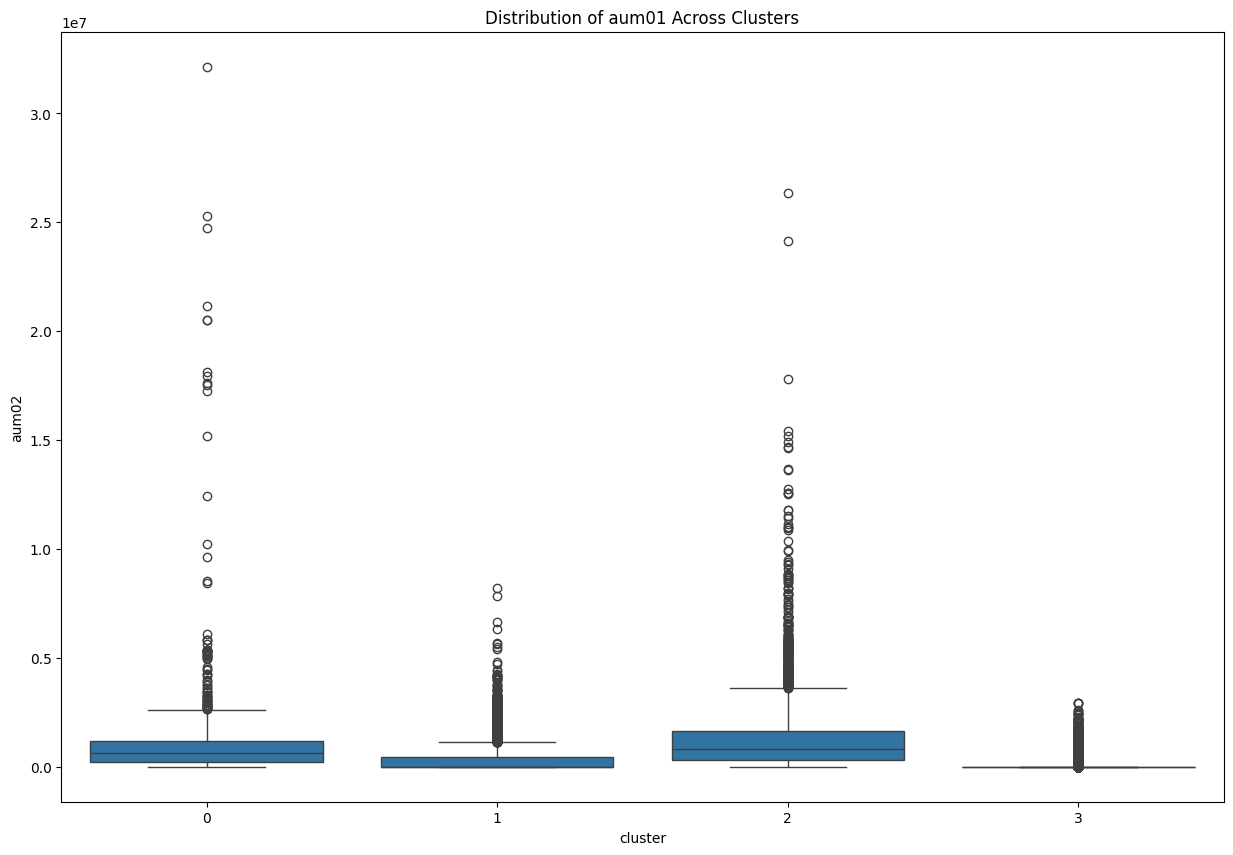

In [34]:
# 計算單一特徵boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=drop0_df[aum_features + ['cluster']], x='cluster', y='aum02')
plt.title('Distribution of aum01 Across Clusters')
plt.show()


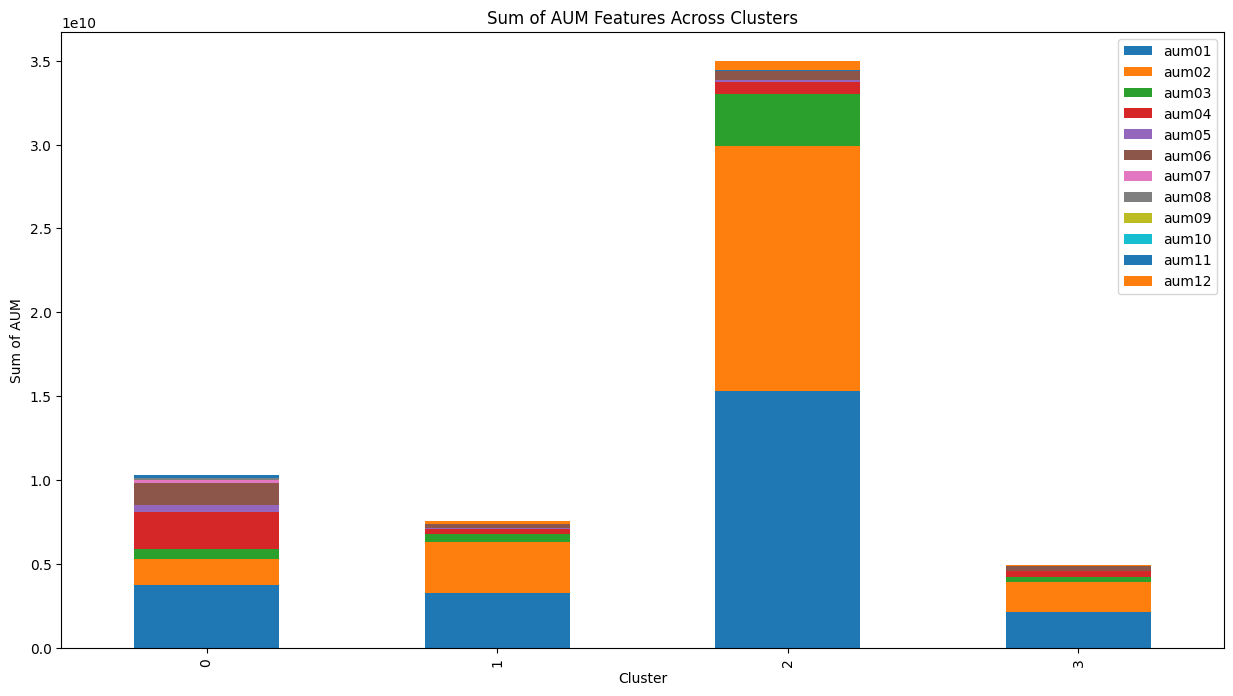

In [35]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[aum_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of AUM Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of AUM')
plt.show()


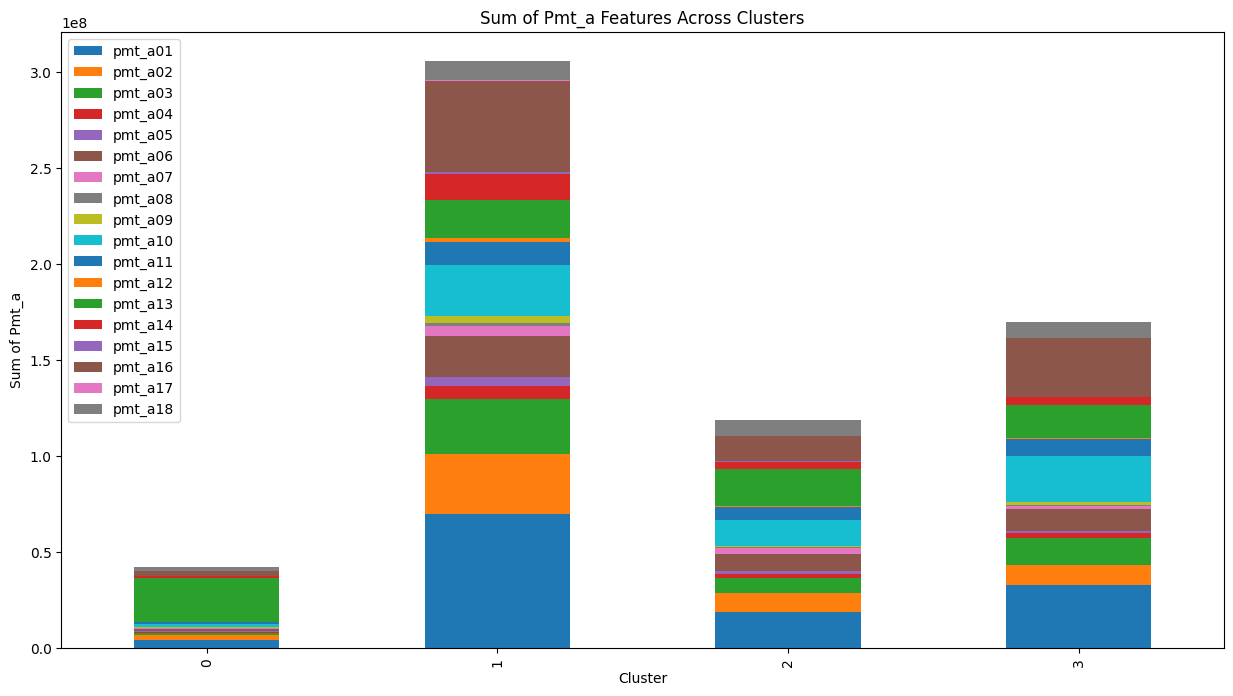

In [46]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[pmt_a_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of Pmt_a Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of Pmt_a')
plt.show()


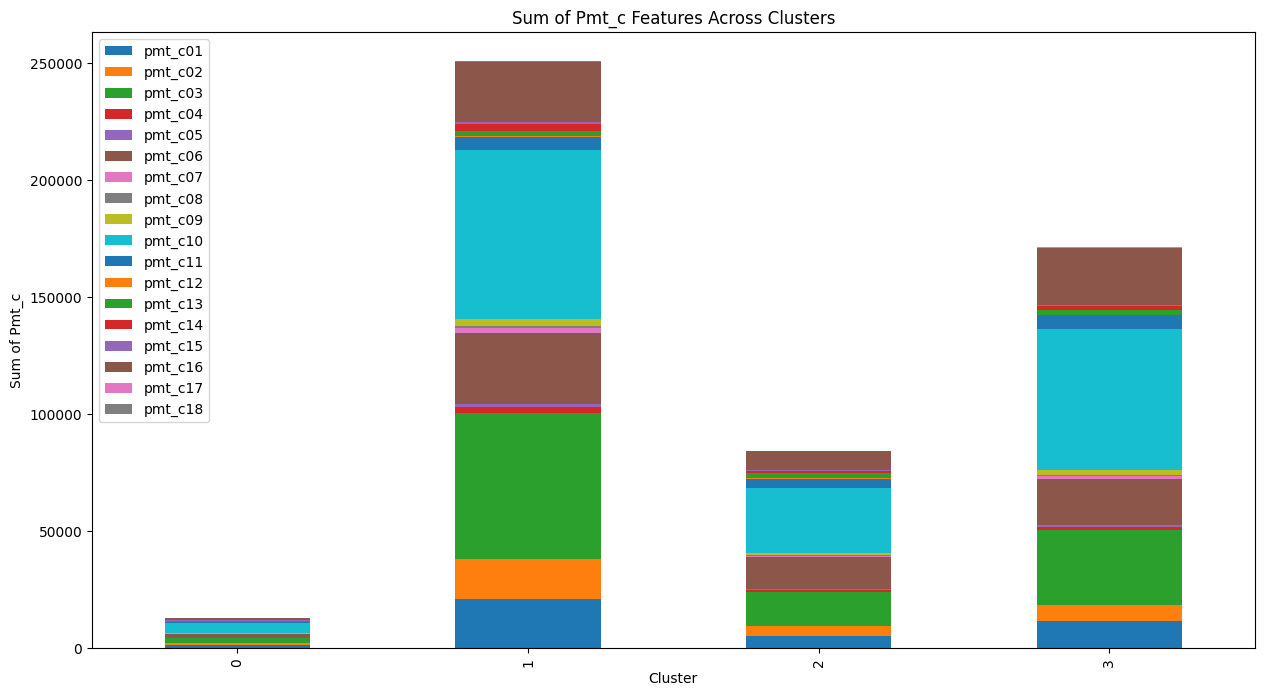

In [47]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[pmt_c_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of Pmt_c Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of Pmt_c')
plt.show()


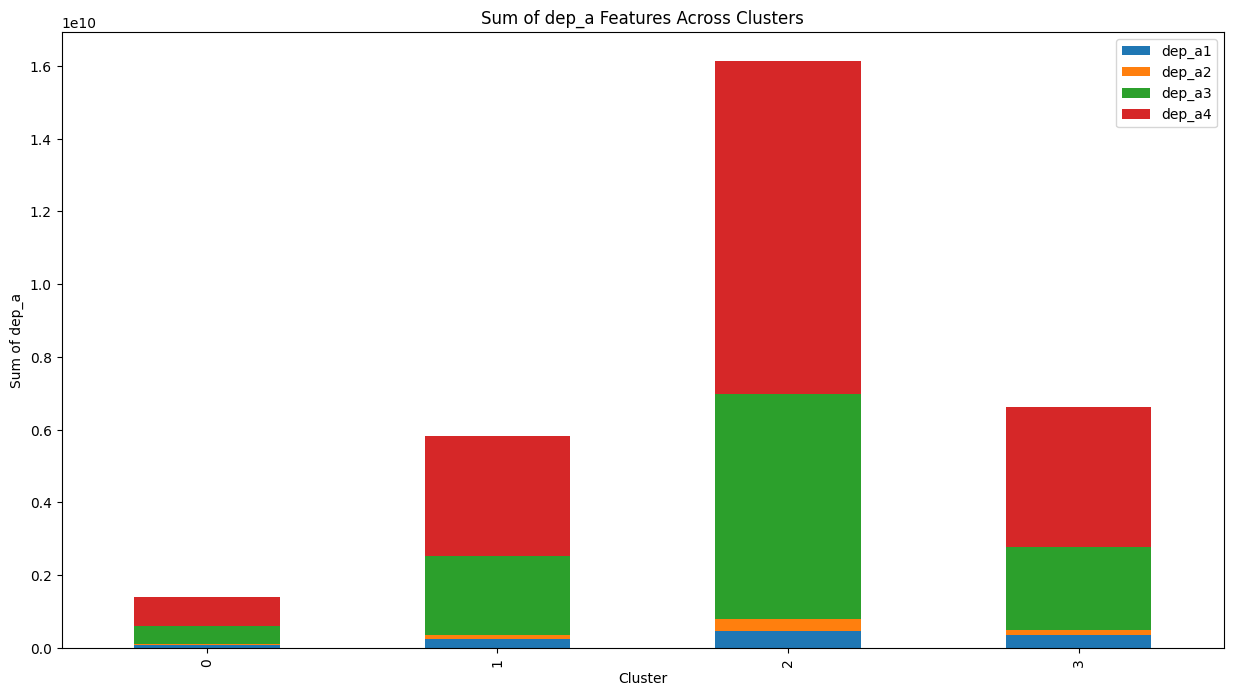

In [48]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[dep_a_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of dep_a Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of dep_a')
plt.show()


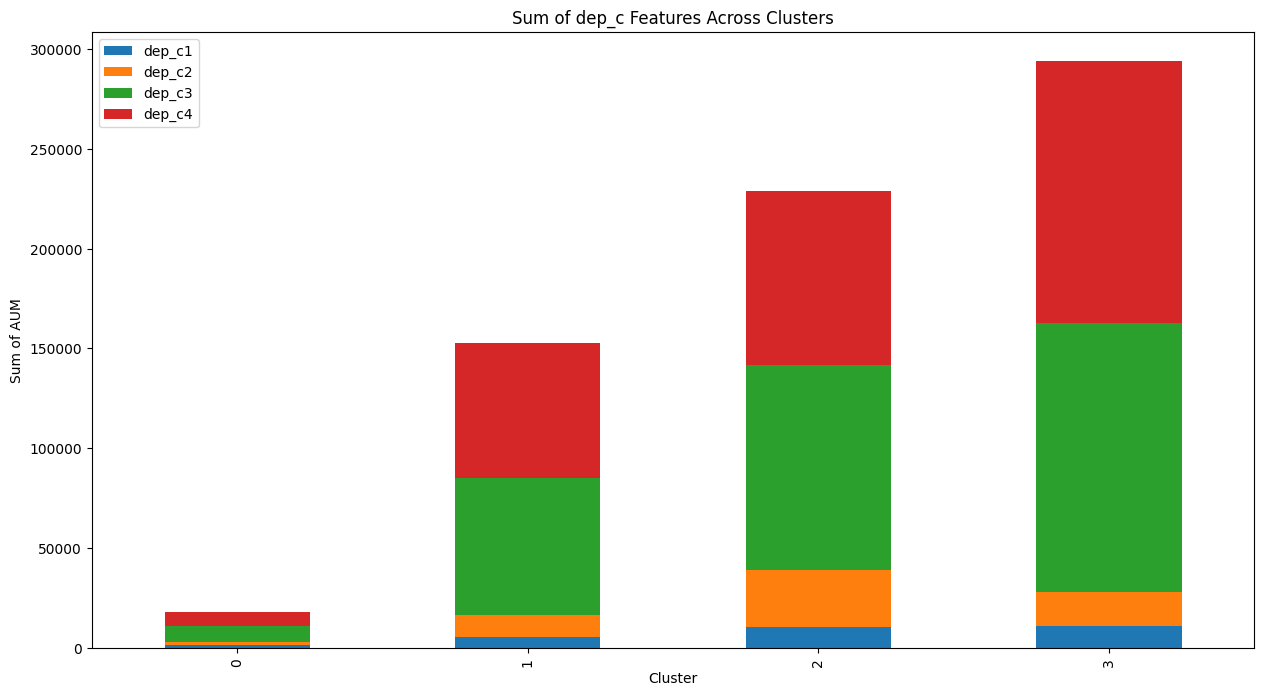

In [90]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[dep_c_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of dep_c Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of AUM')
plt.show()


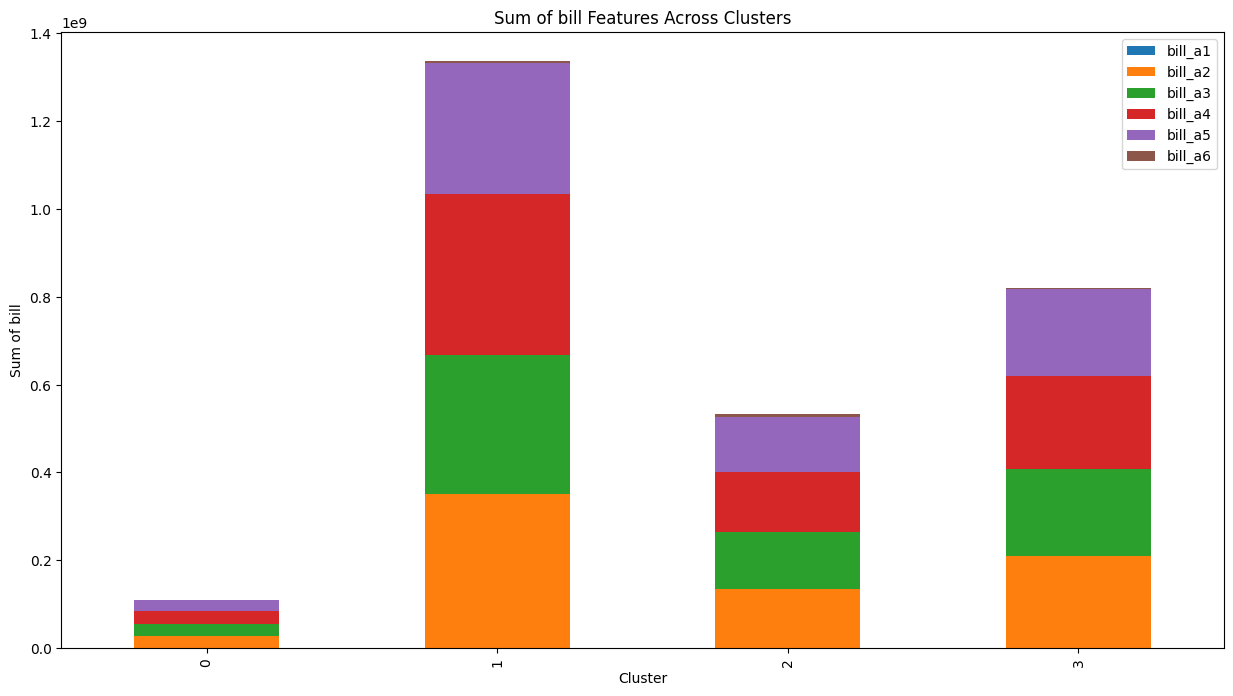

In [45]:
# 计算每个群集的 aum 特征总和
cluster_sums = drop0_df.groupby('cluster')[bill_features].sum()

# 绘制堆叠柱状图
cluster_sums.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Sum of bill Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sum of bill')
plt.show()


## 其他類別

In [52]:
selected_features = [
    'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A',
    'CNT_Exchange_B', 'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login',
    'YN_SLR', 'INV_ADV', 'rs_prod_3', 'gender', 'age', 'edu', 'mry', 'job',
    'occp', 'zip', 'intr_01', 'intr_02', 'intr_03', 'intr_04', 'intr_05',
    'intr_06', 'intr_07', 'intr_08', 'intr_09', 'intr_10', 'intr_11',
    'intr_12', 'intr_13'
]

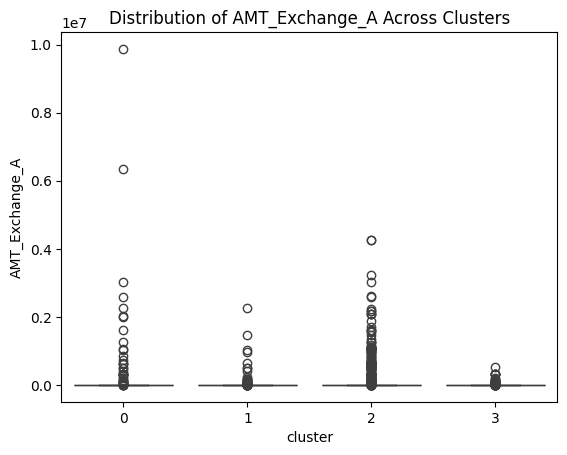

In [91]:
# 換匯金額_線上
sns.boxplot(x='cluster', y='AMT_Exchange_A', data=drop0_df)
plt.title('Distribution of AMT_Exchange_A Across Clusters')
plt.show()

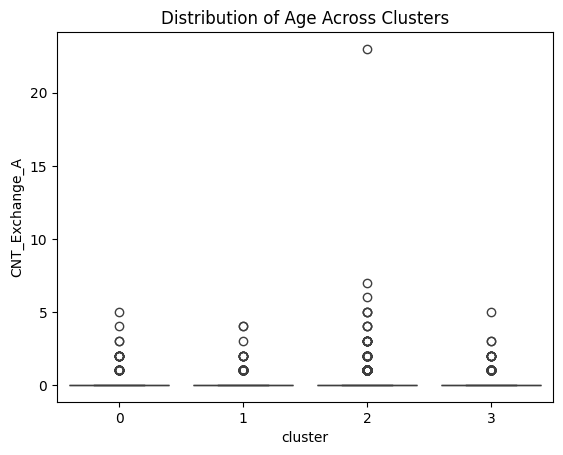

In [87]:
# 換匯次數_線上
sns.boxplot(x='cluster', y='CNT_Exchange_A', data=drop0_df)
plt.title('Distribution of Age Across Clusters')
plt.show()

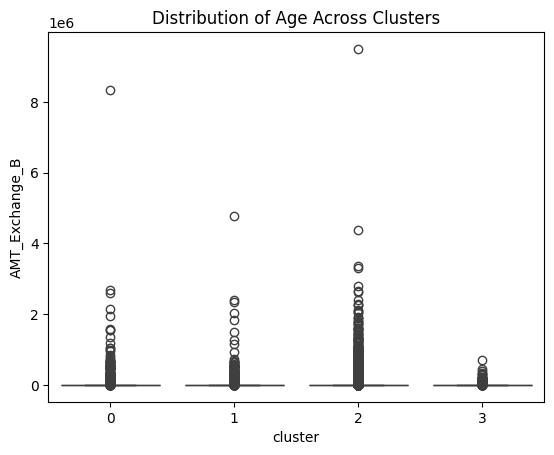

In [88]:
# 換匯金額_線下
sns.boxplot(x='cluster', y='AMT_Exchange_B', data=drop0_df)
plt.title('Distribution of Age Across Clusters')
plt.show()

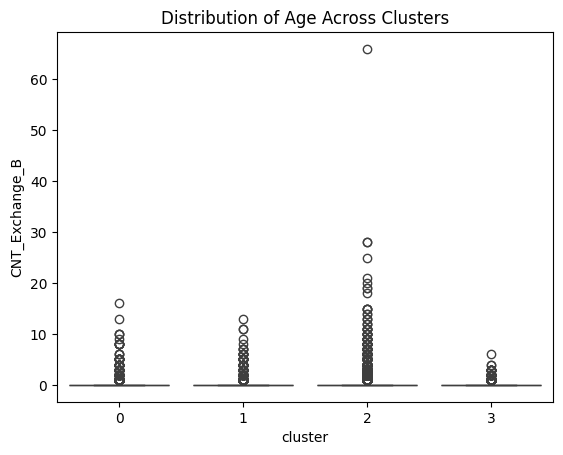

In [89]:
# 換匯次數_線下

sns.boxplot(x='cluster', y='CNT_Exchange_B', data=drop0_df)
plt.title('Distribution of Age Across Clusters')
plt.show()

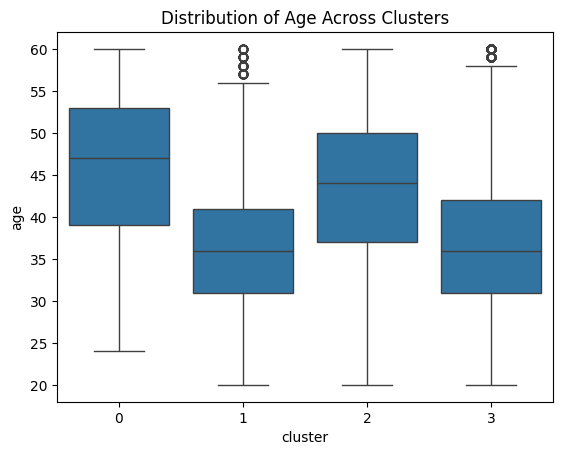

In [75]:
# 行為互動標籤
sns.boxplot(x='cluster', y='age', data=drop0_df)
plt.title('Distribution of Age Across Clusters')
plt.show()

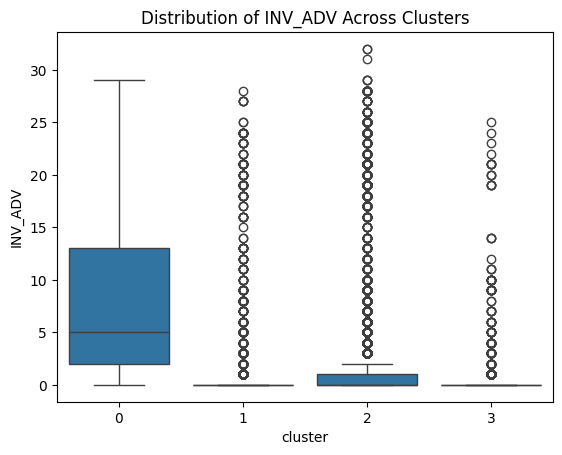

In [92]:
# 理財顧問指標
sns.boxplot(x='cluster', y='INV_ADV', data=drop0_df)
plt.title('Distribution of INV_ADV Across Clusters')
plt.show()


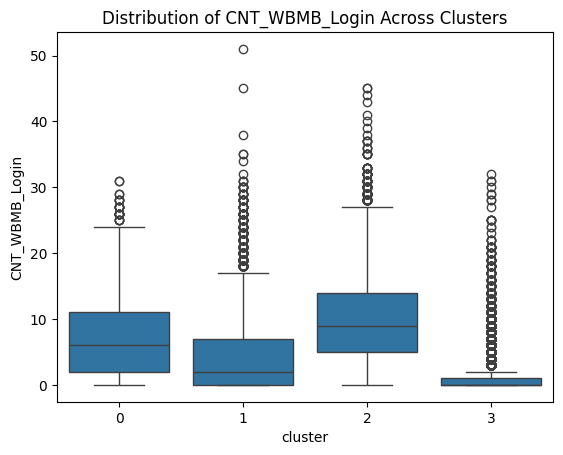

In [93]:
# 數位通路互動指標
sns.boxplot(x='cluster', y='CNT_WBMB_Login', data=drop0_df)
plt.title('Distribution of CNT_WBMB_Login Across Clusters')
plt.show()



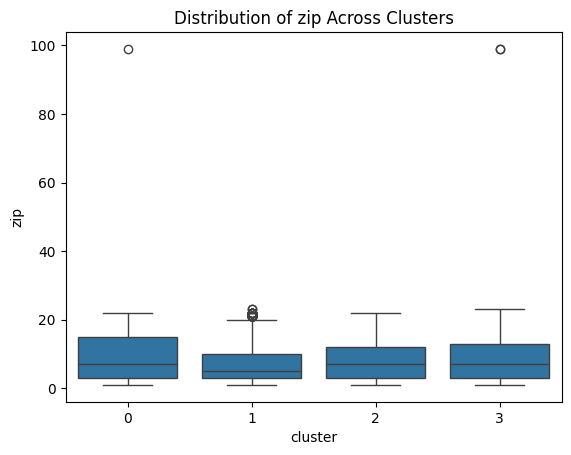

In [77]:
# zip所在地區
sns.boxplot(x='cluster', y='zip', data=drop0_df)
plt.title('Distribution of zip Across Clusters')
plt.show()

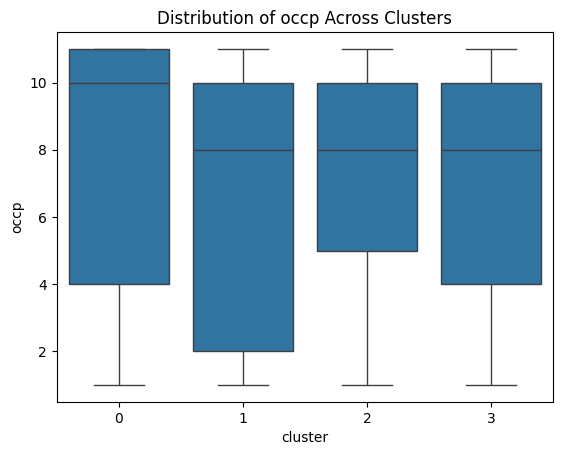

In [78]:
# 職業
sns.boxplot(x='cluster', y='occp', data=drop0_df)
plt.title('Distribution of occp Across Clusters')
plt.show()


## 二元特徵

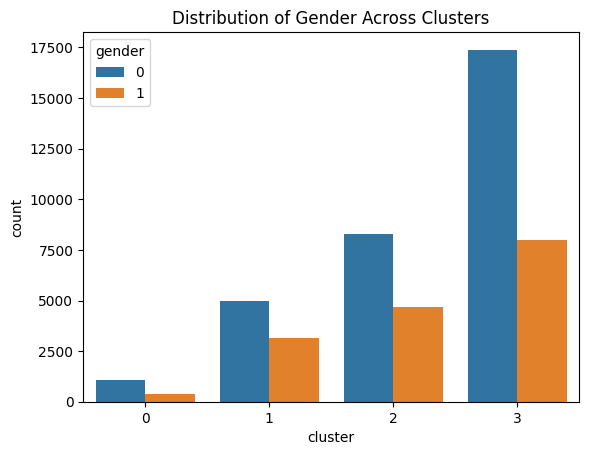

In [54]:
# 性別
sns.countplot(x='cluster', hue='gender', data=drop0_df)
plt.title('Distribution of Gender Across Clusters')
plt.show()

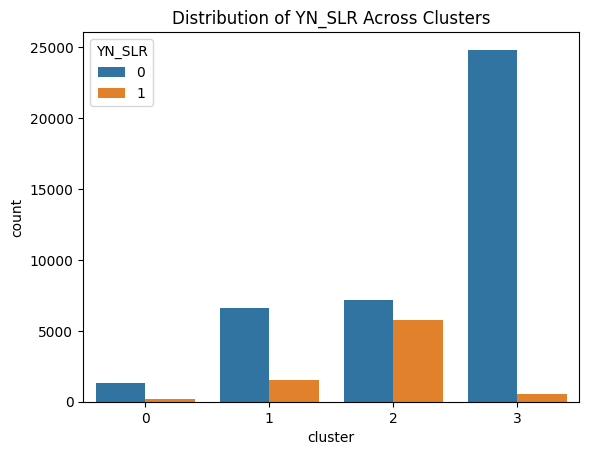

In [94]:
# 是否為薪轉戶
sns.countplot(x='cluster', hue='YN_SLR', data=drop0_df)
plt.title('Distribution of YN_SLR Across Clusters')
plt.show()


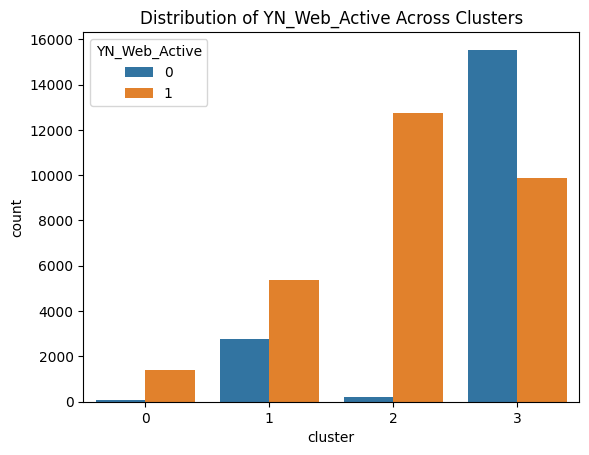

In [95]:
# 數位會員活動標籤
sns.countplot(x='cluster', hue='YN_Web_Active', data=drop0_df)
plt.title('Distribution of YN_Web_Active Across Clusters')
plt.show()

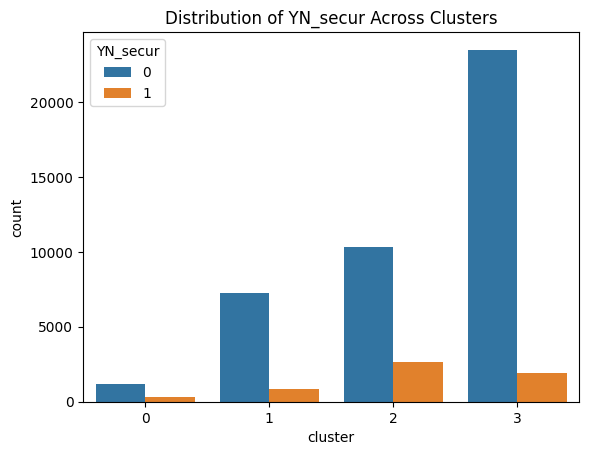

In [96]:
# 證券戶標籤
sns.countplot(x='cluster', hue='YN_secur', data=drop0_df)
plt.title('Distribution of YN_secur Across Clusters')
plt.show()


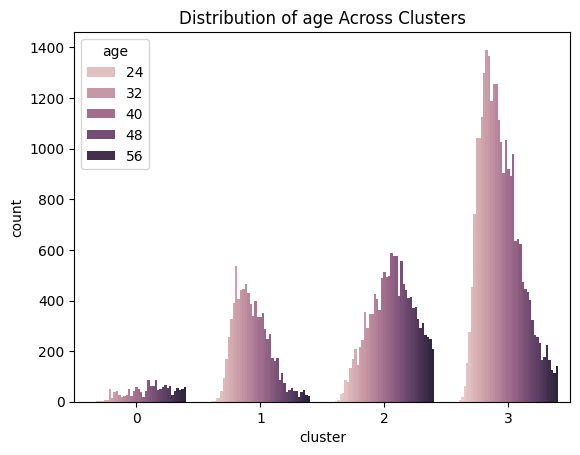

In [98]:
# 年齡
sns.countplot(x='cluster', hue='age', data=drop0_df)
plt.title('Distribution of age Across Clusters')
plt.show()


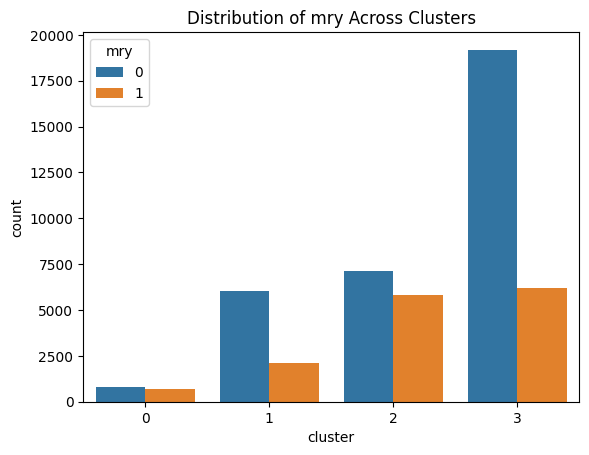

In [97]:
# 婚姻狀態
sns.countplot(x='cluster', hue='mry', data=drop0_df)
plt.title('Distribution of mry Across Clusters')
plt.show()


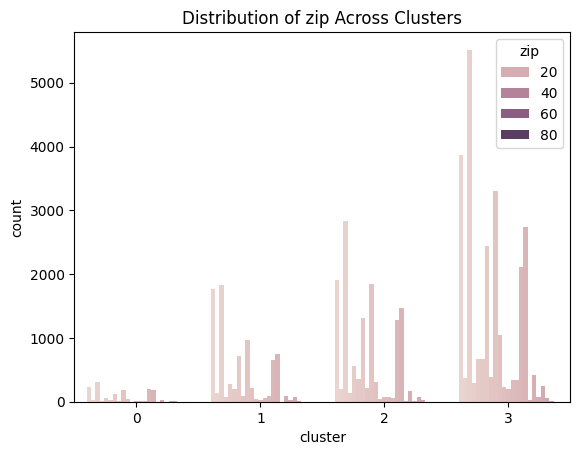

In [99]:
# zip所在地區
sns.countplot(x='cluster', hue='zip', data=drop0_df)
plt.title('Distribution of zip Across Clusters')
plt.show()

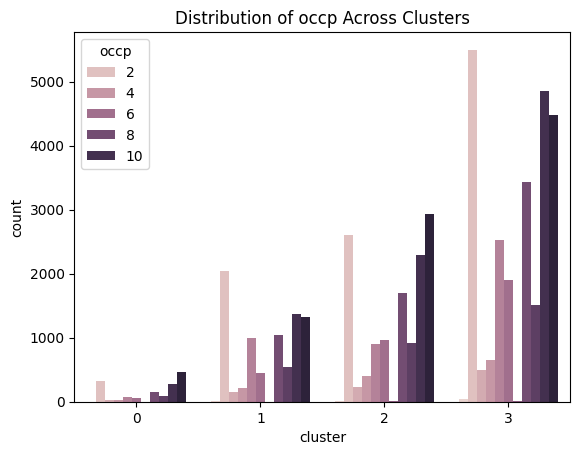

In [102]:
# 職業
sns.countplot(x='cluster', hue='occp', data=drop0_df)
plt.title('Distribution of occp Across Clusters')
plt.show()

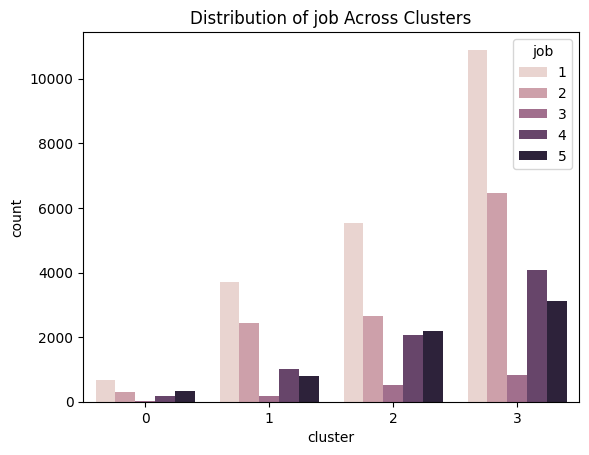

In [104]:
# 職稱
sns.countplot(x='cluster', hue='job', data=drop0_df)
plt.title('Distribution of job Across Clusters')
plt.show()


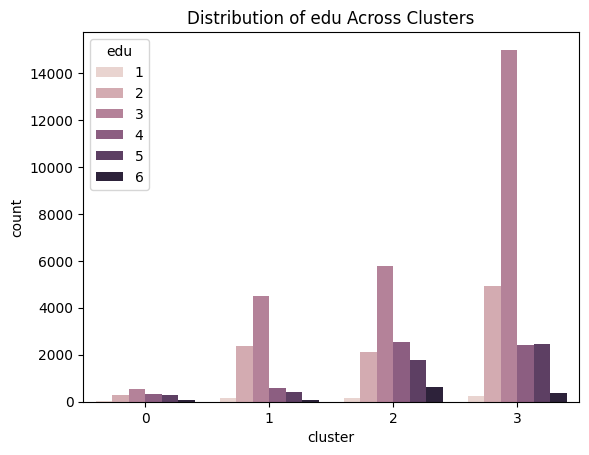

In [105]:
# 教育
sns.countplot(x='cluster', hue='edu', data=drop0_df)
plt.title('Distribution of edu Across Clusters')
plt.show()



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 假設您的DataFrame是 drop1_df，您選擇的特徵是 'Feature1' 和 'Feature2'
# 先進行特徵縮放
scaler = StandardScaler()
drop1_df_scaled = scaler.fit_transform(drop1_df[['Feature1', 'Feature2']])

# 應用DBSCAN聚類
db = DBSCAN(eps=0.5, min_samples=5)
drop1_df['cluster'] = db.fit_predict(drop1_df_scaled)

# 可視化聚類結果
plt.scatter(drop1_df['Feature1'], drop1_df['Feature2'], c=drop1_df['cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering of Features 1 & 2')
plt.show()


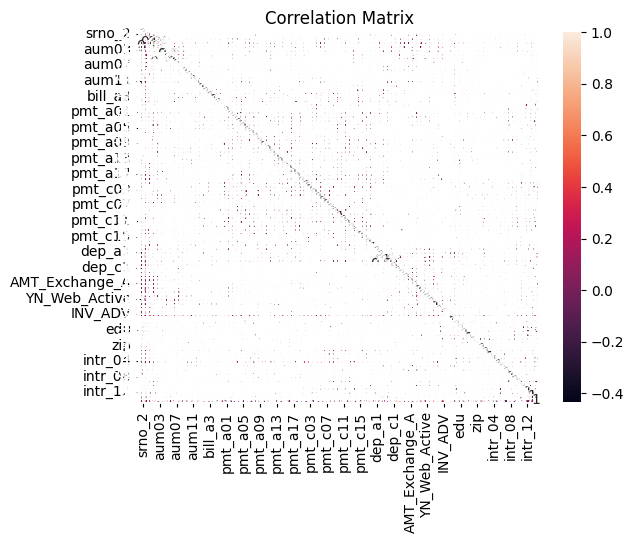

In [76]:
# 相關性分析

corr_matrix = drop1_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [77]:
# Get correlation matrix
corr_matrix = drop1_df.corr()

# Extract correlations of each variable with others, excluding the diagonal (self-correlation)
correlations = corr_matrix.unstack().sort_values(ascending=False)

# Exclude self-correlation (where variable is correlated with itself)
correlations = correlations[correlations != 1]

# Extract the top five most correlated pairs, excluding self-correlation
top_five_correlations = correlations[correlations.index.get_level_values(0) != correlations.index.get_level_values(1)].head(50)


print("Top five most correlated variables:")
print(top_five_correlations)


Top five most correlated variables:
aum02           aum01             0.921884
aum01           aum02             0.921884
dep_a3          dep_a4            0.860719
dep_a4          dep_a3            0.860719
aum04           aum06             0.857304
aum06           aum04             0.857304
YN_SLR          cluster           0.666295
cluster         YN_SLR            0.666295
bill_a4         bill_a2           0.656683
bill_a2         bill_a4           0.656683
pmt_a16         intr_10           0.653770
intr_10         pmt_a16           0.653770
bill_a5         bill_a3           0.621301
bill_a3         bill_a5           0.621301
intr_01         intr_04           0.616229
intr_04         intr_01           0.616229
dep_c3          dep_c4            0.578062
dep_c4          dep_c3            0.578062
aum12           YN_SLR            0.575770
YN_SLR          aum12             0.575770
intr_05         bill_a4           0.550653
bill_a4         intr_05           0.550653
bill_a2         in

## PCA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


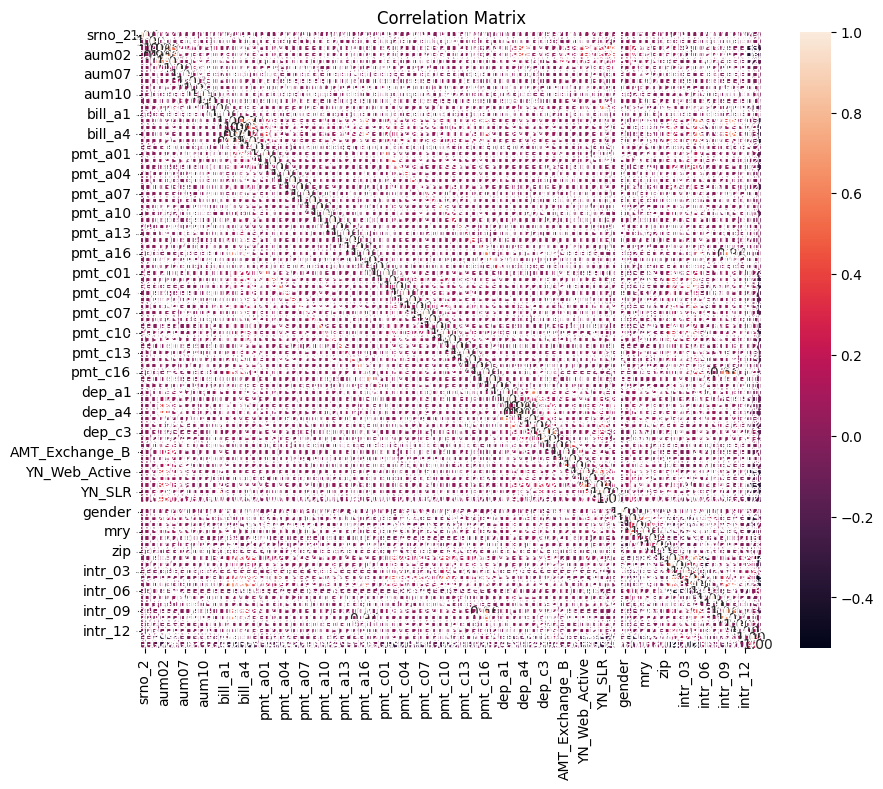

In [145]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 加載數據

data = drop0_df

# 預處理：此處添加缺失值處理、異常值處理等

# 特徵選擇或降維
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data.drop('rs_prod_3', axis=1))  # 假定除去標籤列

pca = PCA(n_components=2)  # 假定降至2維以便視覺化
features_pca = pca.fit_transform(features_scaled)

# 群集分析
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(features_pca)

# 將群集結果添加到原數據中
data['cluster'] = clusters

# 相關性分析
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# pip install nbformat>=4.2.0

import plotly.figure_factory as ff
import pandas as pd

# 假設 data 是包含您提供的統計信息的 pandas DataFrame
# 移除非特徵列
features_data = data.drop(columns=['cluster'])

# 計算相關性矩陣
corr_matrix = features_data.corr().values

# 獲取特徵名稱列表
features_names = features_data.columns.tolist()

# 創建Plotly圖表
fig = ff.create_annotated_heatmap(
    z=corr_matrix,
    x=features_names,
    y=features_names,
    annotation_text=np.around(corr_matrix, decimals=2),
    hoverinfo="z",
    colorscale='Portland'
)

# 更新佈局以增大圖像
fig.update_layout(
    width=800,
    height=800,
    title='Interactive Correlation Matrix',
    xaxis=dict(tickangle=-45)
)

# 顯示圖表
fig.show()


In [150]:
# K-means群集
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)
drop0_df['cluster'] = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [152]:

# 移除DataFrame列名中的多餘空格
drop0_df.columns = drop0_df.columns.str.strip()

# 再次列出清理後的列名，確保它們已被正確修正
print(drop0_df.columns)


Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum05', 'aum07',
       'aum08', 'aum09', 'aum10', 'aum11', 'aum12', 'bill_a1', 'bill_a2',
       'bill_a3', 'bill_a4', 'bill_a5', 'bill_a6', 'pmt_a01', 'pmt_a02',
       'pmt_a03', 'pmt_a04', 'pmt_a05', 'pmt_a06', 'pmt_a07', 'pmt_a08',
       'pmt_a09', 'pmt_a10', 'pmt_a11', 'pmt_a12', 'pmt_a13', 'pmt_a14',
       'pmt_a15', 'pmt_a16', 'pmt_a17', 'pmt_a18', 'pmt_c01', 'pmt_c02',
       'pmt_c03', 'pmt_c04', 'pmt_c05', 'pmt_c06', 'pmt_c07', 'pmt_c08',
       'pmt_c09', 'pmt_c10', 'pmt_c11', 'pmt_c12', 'pmt_c13', 'pmt_c14',
       'pmt_c15', 'pmt_c16', 'pmt_c17', 'pmt_c18', 'dep_a1', 'dep_a2',
       'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 'dep_c3', 'dep_c4',
       'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A', 'CNT_Exchange_B',
       'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login', 'YN_SLR', 'INV_ADV',
       'rs_prod_3', 'gender', 'age', 'edu', 'mry', 'job', 'occp', 'zip',
       'intr_01', 'intr_02', 'intr_03', 'intr_04', 

+ rs_prod   這個人每個月有沒有買

    + rs_prod_df3 這個人有沒有買

## 隨機森林分析

In [147]:
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 分離特徵和目標變數
X = drop0_df.drop(['rs_prod_3'], axis=1)  # 特徵集
y = drop0_df['rs_prod_3']  # 目標變數

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

# 進行預測
predictions = rf_model.predict(X_test)

# 評估模型
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 0.0
Mean Squared Error: 0.0


## 比對圖 (train vs test)

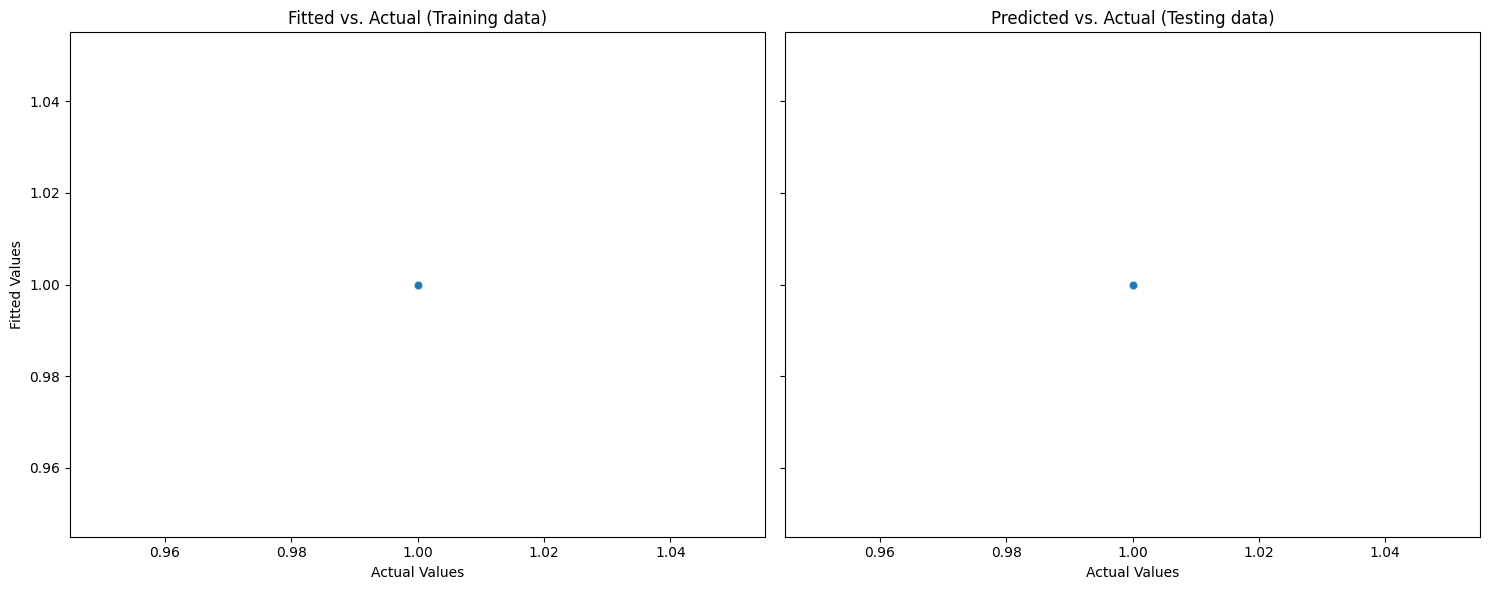

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your model is named as 'rf_model'
# Train predictions
train_predictions = rf_model.predict(X_train)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# First plot (Fitted results on training data)
sns.scatterplot(ax=axes[0], x=y_train, y=train_predictions, alpha=0.6)
sns.lineplot(ax=axes[0], x=y_train, y=y_train, color='red')  # Ideal line
axes[0].set_title('Fitted vs. Actual (Training data)')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Fitted Values')

# Second plot (Prediction results on testing data)
sns.scatterplot(ax=axes[1], x=y_test, y=predictions, alpha=0.6)
sns.lineplot(ax=axes[1], x=y_test, y=y_test, color='red')  # Ideal line
axes[1].set_title('Predicted vs. Actual (Testing data)')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')

# Display the plot
plt.tight_layout()
plt.show()


In [153]:
# K-means群集
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)
drop0_df['cluster'] = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [138]:
# 移除DataFrame列名中的多餘空格
drop0_df.columns = drop0_df.columns.str.strip()

# 再次列出清理後的列名，確保它們已被正確修正
print(drop0_df.columns)

Index(['srno_2', 'yyyymm', 'aum01', 'aum02', 'aum03', 'aum05', 'aum07',
       'aum08', 'aum09', 'aum10', 'aum11', 'aum12', 'bill_a1', 'bill_a2',
       'bill_a3', 'bill_a4', 'bill_a5', 'bill_a6', 'pmt_a01', 'pmt_a02',
       'pmt_a03', 'pmt_a04', 'pmt_a05', 'pmt_a06', 'pmt_a07', 'pmt_a08',
       'pmt_a09', 'pmt_a10', 'pmt_a11', 'pmt_a12', 'pmt_a13', 'pmt_a14',
       'pmt_a15', 'pmt_a16', 'pmt_a17', 'pmt_a18', 'pmt_c01', 'pmt_c02',
       'pmt_c03', 'pmt_c04', 'pmt_c05', 'pmt_c06', 'pmt_c07', 'pmt_c08',
       'pmt_c09', 'pmt_c10', 'pmt_c11', 'pmt_c12', 'pmt_c13', 'pmt_c14',
       'pmt_c15', 'pmt_c16', 'pmt_c17', 'pmt_c18', 'dep_a1', 'dep_a2',
       'dep_a3', 'dep_a4', 'dep_c1', 'dep_c2', 'dep_c3', 'dep_c4',
       'AMT_Exchange_A', 'AMT_Exchange_B', 'CNT_Exchange_A', 'CNT_Exchange_B',
       'YN_Web_Active', 'YN_secur', 'CNT_WBMB_Login', 'YN_SLR', 'INV_ADV',
       'rs_prod_3', 'gender', 'age', 'edu', 'mry', 'job', 'occp', 'zip',
       'intr_01', 'intr_02', 'intr_03', 'intr_04', 

In [154]:
test_cluster_labels = kmeans.predict(X_test)
cluster_labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [162]:
print(f'Unique classes in y_train: {np.unique(y_train)}')

Unique classes in y_train: [0 1 2 3]


In [159]:
# 检查长度
print(f"Length of X_train: {len(X_train)}")
print(f"Length of cluster_labels: {len(cluster_labels)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of test_cluster_labels: {len(test_cluster_labels)}")

# 如果长度匹配，则可以安全地添加群集标签
if len(X_train) == len(cluster_labels):
    X_train['cluster_label'] = cluster_labels
else:
    print("Length of cluster_labels does not match length of X_train.")

if len(X_test) == len(test_cluster_labels):
    X_test['cluster_label'] = test_cluster_labels
else:
    print("Length of test_cluster_labels does not match length of X_test.")


Length of X_train: 38398
Length of cluster_labels: 47998
Length of X_test: 9600
Length of test_cluster_labels: 9600
Length of cluster_labels does not match length of X_train.


In [177]:
# 假设您的KMeans模型初始化如下：
kmeans = KMeans(n_clusters=4, random_state=42)

# 仅使用X_train来拟合KMeans模型
kmeans.fit(X_train)

# 重新生成X_train的聚类标签
cluster_labels = kmeans.labels_

# 现在cluster_labels的长度应该与X_train匹配
print(f"Length of X_train: {len(X_train)}")
print(f"Length of cluster_labels: {len(cluster_labels)}")

# 之后可以安全地将聚类标签添加到X_train中
X_train['cluster_label'] = cluster_labels

# 对于X_test，您已经正确地得到了匹配的长度，可以按照之前的方法添加聚类标签
X_test['cluster_label'] = test_cluster_labels


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Length of X_train: 38398
Length of cluster_labels: 38398


## XGBOOST & CATBOOST

In [182]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 假设您的目标列（y_train和y_test）已经准备好
# 添加聚类标签到训练和测试数据
X_train['cluster_label'] = cluster_labels
# X_test['cluster_label'] = test_cluster_labels  # 假设这一步之前已完成

# 训练XGBoost模型
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = xgb_model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.22%


In [179]:
# 在訓練集上進行預測
y_train_pred = xgb_model.predict(X_train)

# 評估訓練集上的性能
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Model Accuracy on Training Set: {train_accuracy * 100:.2f}%")

# 比較訓練集和測試集的準確率
print(f"Model Accuracy on Test Set: {96.22}%")  # 使用之前的測試集準確率


Model Accuracy on Training Set: 99.97%
Model Accuracy on Test Set: 96.22%


In [180]:
from sklearn.model_selection import cross_val_score

# 交叉驗證
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# 打印每一折的準確率和平均準確率
print(f"CV Scores: {cv_scores}")
print(f"CV Mean Accuracy: {cv_scores.mean() * 100:.2f}%")


CV Scores: [0.95989583 0.95820313 0.96197917 0.9546816  0.95585363]
CV Mean Accuracy: 95.81%


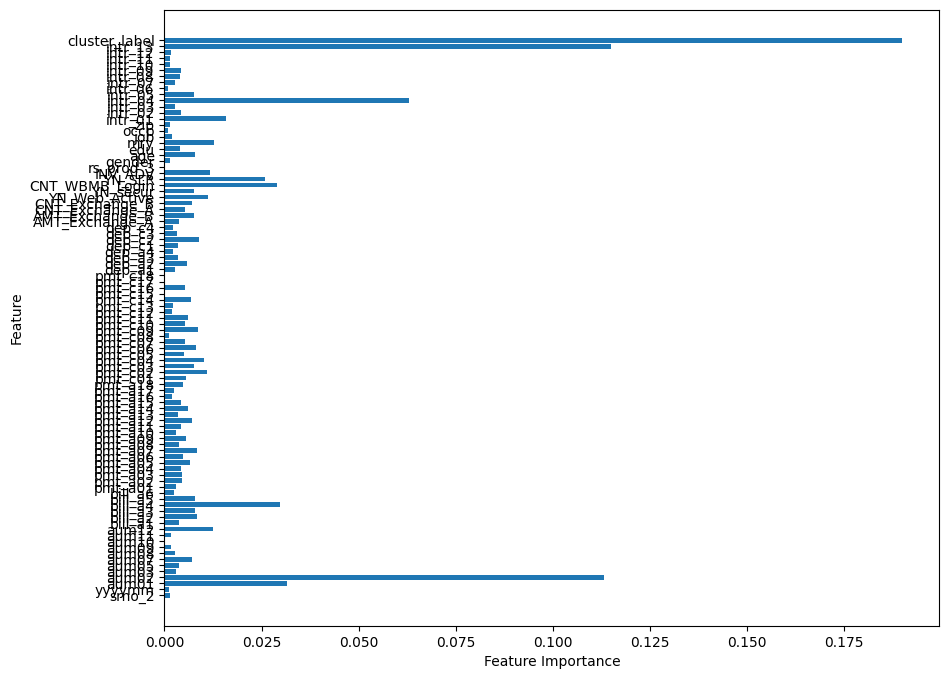

In [186]:
import matplotlib.pyplot as plt

# 获取特征重要性
feature_importances = xgb_model.feature_importances_

# 可视化特征重要性
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


In [199]:
# 根据您的数据创建特征类别列表
intr_features = [f'intr_{i:02d}' for i in range(1, 14)]
aum_features = [f'aum{i:02d}' for i in range(1, 14)]
bill_features = [f'bill_a{i}' for i in range(1, 7)]
pmt_a_features = [f'pmt_a{i:02d}' for i in range(1, 19)]
pmt_c_features = [f'pmt_c{i:02d}' for i in range(1, 19)]
dep_a_features = [f'dep_a{i}' for i in range(1, 5)]
dep_c_features = [f'dep_c{i}' for i in range(1, 5)]

# 其他特征可能包括不符合上述模式的特征
other_features = [col for col in X_train.columns if col not in (intr_features + aum_features + bill_features + pmt_a_features + pmt_c_features + dep_a_features + dep_c_features)]


In [200]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = [i for i, f in enumerate(model.get_booster().feature_names) if f in features]
    filtered_features = [f for i, f in enumerate(model.get_booster().feature_names) if i in indices]
    filtered_importances = [importances[i] for i in indices]
    
    # 对特征和其重要性进行排序
    sorted_indices = sorted(range(len(filtered_importances)), key=lambda k: filtered_importances[k], reverse=True)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.barh(range(len(sorted_indices)), [filtered_importances[i] for i in sorted_indices], color='b', align='center')
    plt.yticks(range(len(sorted_indices)), [filtered_features[i] for i in sorted_indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [203]:
import os

def save_feature_importance_graphs(model, features_groups, directory="feature_importance_graphs"):
    # 确保保存图像的目录存在
    if not os.path.exists(directory):
        os.makedirs(directory)

    importances = model.feature_importances_
    feature_names = model.get_booster().feature_names
    
    # 遍历每组特征
    for feature_category, features in features_groups.items():
        # 创建特征重要性字典
        feature_importance_dict = {feature_names[i]: importances[i] for i in range(len(feature_names)) if feature_names[i] in features}
        sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
        df = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, y='Feature', x='Importance', palette='viridis')
        plt.title(f"Feature Importance for '{feature_category}'")
        plt.tight_layout()

        # 保存图像到指定目录
        plt.savefig(f"{directory}/{feature_category}_importance.png")
        plt.close()  # 关闭图表以节省内存

# 特征分组
feature_groups = {
    'intr_features': intr_features,
    'aum_features': aum_features,
    'bill_features': bill_features,
    'pmt_a_features': pmt_a_features,
    'pmt_c_features': pmt_c_features,
    'dep_a_features': dep_a_features,
    'dep_c_features': dep_c_features,
    'other_features': other_features
}

# 保存特征重要性图
save_feature_importance_graphs(xgb_model, feature_groups)


/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_42052/3070186798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Feature', x='Importance', palette='viridis')
/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_42052/3070186798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Feature', x='Importance', palette='viridis')
/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_42052/3070186798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Feature', x='Importance', palette=